# ***STOCK PEDICTION USING MACHINE LEARNING***


---



DATASET USED:-   NETFIX STOCK PRICE DATASET    [link text](https://https://www.kaggle.com/jainshukal/netflix-stock-price)                 

ML MODELS USED IN OUR STOCK PREDICTOR:-


1.   DECISION TREE REGRESSION (SUPERVISED LEARNING)
2.   LINEAR REGRESSION (SUPERVISED LEARNING)

1.   K- NEAREST NEIGHBOUR (SUPERVISED LEARNING, LAZY LEARNING)
2.   LONG SHORT TERM MEMORY (SELF SUPERVISED LEARNING)

**RECOMMENDED IDLE:- GOOGLE COLAB NOTEBOOK**










In [ ]:
### Stock predictor

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')


In [ ]:
## import dataset
from google.colab import files
uploaded = files.upload()

Saving NFLX.csv to NFLX.csv


In [ ]:
### storing 
df = pd.read_csv('NFLX.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000
5,2015-12-23,116.910004,118.559998,115.779999,118.160004,118.160004,9324300


In [ ]:
df.shape

(1007, 7)

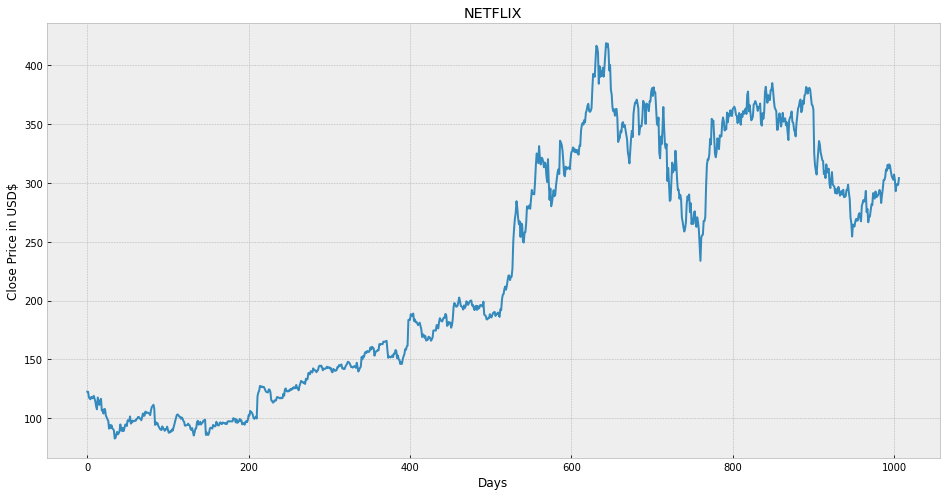

In [ ]:
### visualize
plt.figure(figsize=(16,8))
plt.title('NETFLIX')
plt.xlabel('Days')
plt.ylabel('Close Price in USD$')
plt.plot(df['Close'])
plt.show()

In [ ]:
### get close price
df = df[['Close']]
df.head(4)

,Close
0,122.639999
1,122.510002
2,118.019997
3,116.629997


In [ ]:
future_days = 150
df['Prediction'] = df[['Close']].shift(-future_days)
df.head(4)

,Close,Prediction
0,122.639999,85.889999
1,122.510002,87.660004
2,118.019997,91.410004
3,116.629997,92.040001


In [ ]:
df.tail(4)

,Close,Prediction
1003,298.929993,NaN
1004,298.440002,NaN
1005,298.500000,NaN
1006,304.209991,NaN


In [ ]:
### Creating feature dataset
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[122.639999]
 [122.510002]
 [118.019997]
 [116.629997]
 [116.239998]
 [118.160004]
 [117.330002]
 [117.110001]
 [119.120003]
 [116.709999]
 [114.379997]
 [109.959999]
 [107.660004]
 [117.68    ]
 [114.559998]
 [111.389999]
 [114.970001]
 [116.580002]
 [106.559998]
 [107.059998]
 [104.040001]
 [107.889999]
 [107.739998]
 [102.349998]
 [100.720001]
 [ 99.120003]
 [ 97.830002]
 [ 91.150002]
 [ 94.410004]
 [ 91.839996]
 [ 94.089996]
 [ 91.489998]
 [ 90.739998]
 [ 89.709999]
 [ 82.790001]
 [ 83.32    ]
 [ 86.129997]
 [ 88.449997]
 [ 86.349998]
 [ 87.400002]
 [ 89.050003]
 [ 94.760002]
 [ 90.489998]
 [ 89.230003]
 [ 91.93    ]
 [ 89.120003]
 [ 91.610001]
 [ 94.529999]
 [ 94.790001]
 [ 93.410004]
 [ 98.300003]
 [ 97.610001]
 [ 97.93    ]
 [101.580002]
 [ 95.489998]
 [ 96.230003]
 [ 98.      ]
 [ 97.360001]
 [ 97.660004]
 [ 98.129997]
 [ 97.860001]
 [ 99.349998]
 [ 99.720001]
 [101.120003]
 [101.059998]
 [ 99.839996]
 [ 99.589996]
 [ 98.360001]
 [101.209999]
 [104.129997]
 [102.190002]
 [102.

In [ ]:
### creating target data
y = np.array(df['Prediction'])[:-future_days]
print(y)

[ 85.889999  87.660004  91.410004  92.040001  91.650002  91.25
  94.370003  93.559998  93.099998  93.440002  97.029999  95.110001
  93.989998  93.93      95.889999  96.589996  95.309998  95.120003
  96.370003  96.160004  95.870003  95.260002  95.940002  95.18
  97.32      97.580002  97.300003  97.449997  97.449997  97.379997
  97.379997 100.089996  99.150002  99.660004  96.5       99.050003
  96.089996  97.010002  97.339996  99.480003  98.059998  98.25
  94.879997  95.830002  95.940002  94.559998  97.07      97.480003
  96.669998  98.550003 102.629997 102.339996 106.279999 105.07
 104.82     103.330002 100.589996  99.5      100.230003 101.470001
  99.800003 118.790001 121.870003 123.349998 127.5      127.330002
 126.510002 126.970001 126.470001 126.57     124.870003 123.300003
 122.339996 122.139999 122.029999 124.580002 124.339996 122.190002
 115.419998 114.779999 113.379997 113.589996 115.190002 115.029999
 115.209999 117.959999 118.040001 117.690002 117.410004 116.93
 117.510002 117

In [ ]:
### Splitting data into 75% training & 25% testing dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
### creating models
### Creating DTReggresor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
### Creating LinearRegressor
lr =  LinearRegression().fit(x_train, y_train)

In [ ]:
### get the x rows of the feature dataset
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[349.100006],
       [355.709991],
       [325.890015],
       [321.100006],
       [339.559998],
       [333.130005],
       [346.399994],
       [364.700012],
       [346.709991],
       [332.670013],
       [329.540009],
       [333.160004],
       [301.829987],
       [312.869995],
       [299.829987],
       [284.839996],
       [285.809998],
       [301.779999],
       [317.380005],
       [309.100006],
       [315.440002],
       [310.839996],
       [327.5     ],
       [317.920013],
       [303.470001],
       [294.070007],
       [294.399994],
       [286.730011],
       [290.059998],
       [286.209991],
       [270.600006],
       [266.980011],
       [262.130005],
       [258.820007],
       [261.429993],
       [266.630005],
       [282.649994],
       [288.75    ],
       [286.130005],
       [290.299988],
       [275.329987],
       [282.880005],
       [265.140015],
       [269.700012],
       [265.320007],
       [274.880005],
       [276.019989],
       [266.8

In [ ]:
### Showing model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
### Showing model linear prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[354.98999   359.309998  354.450012  348.109985  354.269989  359.730011
 351.140015  354.390015  355.059998  349.190002  289.290009  343.279999
 336.630005  353.399994  355.730011  357.130005  360.869995  352.01001
 351.269989  345.559998  310.829987  286.730011  353.369995  357.119995
 363.519989  365.209991  369.209991  371.040009  317.920013  362.200012
 370.019989  335.779999  317.940002  375.429993  381.720001  335.779999
 376.160004  327.5       381.        379.5       373.25      376.160004
 365.98999   365.2400055 365.98999   315.100006  373.25      335.779999
 317.940002  315.899994  335.779999  332.700012  325.929993  358.820007
 319.5       307.630005  307.630005  307.1950075 307.1950075 315.899994
 308.929993  310.829987  299.829987  299.109985  295.76001   296.779999
 359.730011  298.98999   297.809998  296.929993  366.959991  260.579987
 291.029999  291.769989  296.779999  286.209991  289.290009  291.519989
 293.25      354.269989  294.339996  287.98999   288.269989  288.

VISUALIZING DECISION TREE REGRESSION MODEL

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


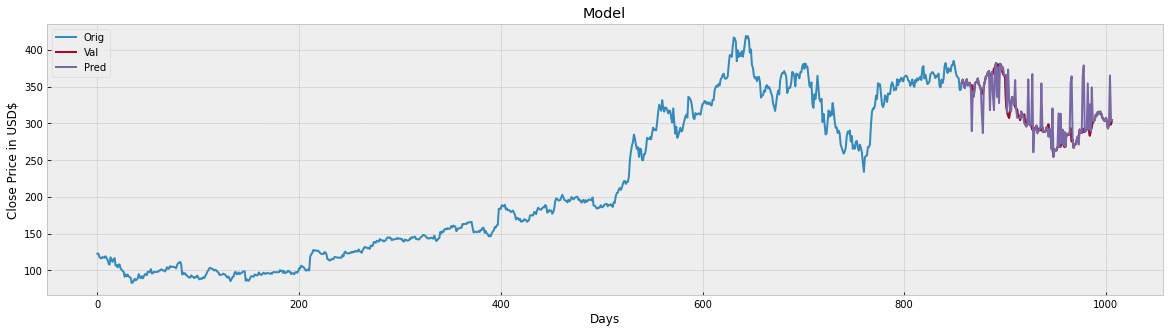

In [ ]:
### Visualizing the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(20, 5))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price in USD$')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

VISUALIZING LINEAR REGRESSION MODEL

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


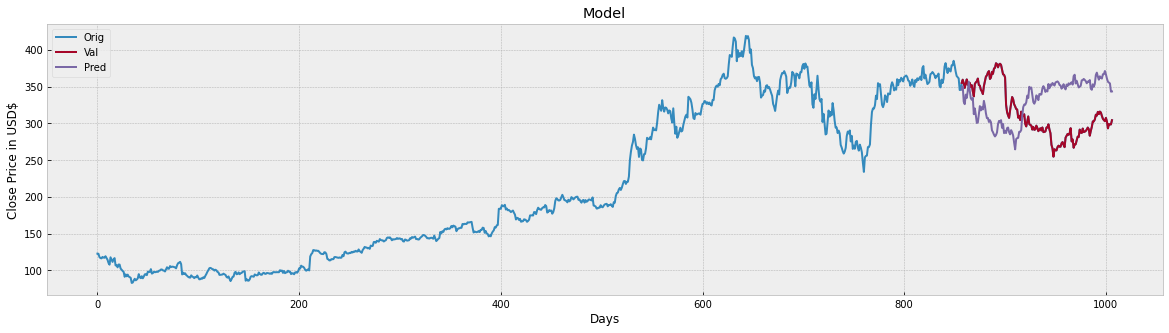

In [ ]:
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(20, 5))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price in USD$')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

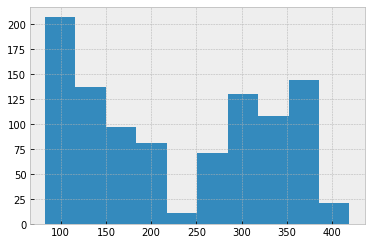

In [ ]:
df['Close'].hist()

In [ ]:
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

KNN MODEL- IMPLEMENTATION & VISUALIZING

In [ ]:
### Implementing knn
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
### scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:375: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:376: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [ ]:
x_valid

,0,1
0,NaN,0.762289
1,NaN,0.806020
2,NaN,0.608733
3,NaN,0.577043
4,NaN,0.699173
...,...,...
145,NaN,0.863315
146,NaN,0.852597
147,NaN,0.841284
148,NaN,0.736884


In [ ]:
### Removing all Missing valus
x_valid1 = x_valid.dropna(axis=1)

In [ ]:
x_valid1

,1
0,0.762289
1,0.806020
2,0.608733
3,0.577043
4,0.699173
...,...
145,0.863315
146,0.852597
147,0.841284
148,0.736884


In [ ]:
#x_valid2 = x_valid.isnull()
#x_valid3 = x_valid[~x_valid2]

In [ ]:
### adjusting best parameters from gridsearch
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

### fitting the model
model.fit(x_train, y_train)
predictions = model.predict(x_valid1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


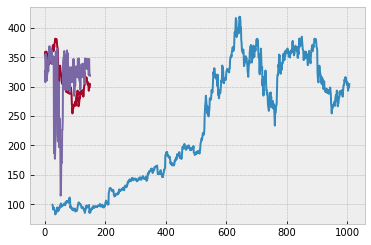

<Figure size 1440x360 with 0 Axes>

In [ ]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = predictions

valid.index = df[:150].index
train = df[25:]

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.figure(figsize=(20, 5))
#plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

LSTM- MODEL BUILDING & VISUALIZING

In [ ]:
### imlementing LSTM
import math
import pandas_datareader as web
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NFLX.csv to NFLX (1).csv


In [ ]:
daf = pd.read_csv('NFLX.csv')
daf.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000
5,2015-12-23,116.910004,118.559998,115.779999,118.160004,118.160004,9324300


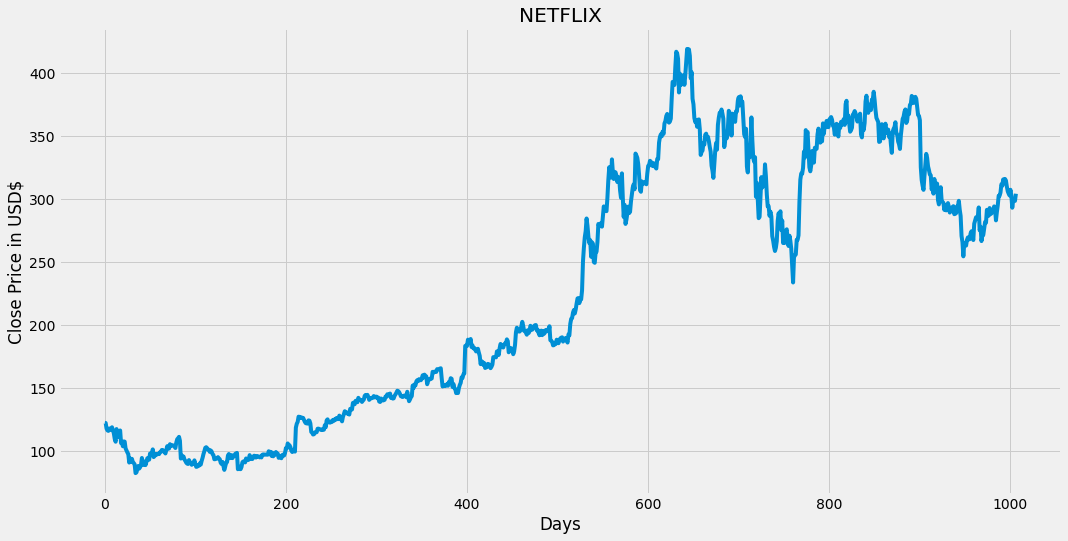

In [ ]:
### visualize
plt.figure(figsize=(16,8))
plt.title('NETFLIX')
plt.xlabel('Days')
plt.ylabel('Close Price in USD$')
plt.plot(df['Close'])
plt.show()

In [ ]:
### creating new dataframe with close column
data = daf.filter(['Close'])
### convert it to np array
dataset = data.values
### get no. of rows to train the model
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

806

In [ ]:
### Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.11853768],
       [0.11815099],
       [0.10479504],
       ...,
       [0.64147183],
       [0.6416503 ],
       [0.65863523]])

In [ ]:
### create the training dataset
### create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
### split the data into x_train & y_train dataset
x_train = []
y_train = []
### 

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()
    

[array([0.11853768, 0.11815099, 0.10479504, 0.10066035, 0.09950026,
       0.1052115 , 0.10274258, 0.10208817, 0.10806711, 0.10089832,
       0.09396751, 0.08081979, 0.07397823, 0.10378368, 0.09450294,
       0.08507347, 0.09572253, 0.10051163, 0.07070616, 0.07219346,
       0.06321019, 0.07466238, 0.07421618, 0.05818311, 0.05333452,
       0.04857517, 0.04473794, 0.02486763, 0.03456483, 0.02692009,
       0.03361293, 0.02587898, 0.02364804, 0.0205842 , 0.        ,
       0.00157653, 0.00993514, 0.01683621, 0.01058956, 0.01371289,
       0.01862098, 0.03560593, 0.02290439, 0.01915641, 0.02718781,
       0.0188292 , 0.02623595, 0.03492176, 0.03569516, 0.03159023,
       0.046136  , 0.04408353, 0.04503539, 0.05589268, 0.03777737,
       0.03997859, 0.04524362, 0.04333988, 0.04423227, 0.04563031])]
[0.044827175917663165]

[array([0.11853768, 0.11815099, 0.10479504, 0.10066035, 0.09950026,
       0.1052115 , 0.10274258, 0.10208817, 0.10806711, 0.10089832,
       0.09396751, 0.08081979, 0.0

In [ ]:
### convert the x_train & y_train dataset into np array
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
### Reshape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(746, 60, 1)

In [ ]:
### Building LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
### Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
### Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


746/746 [==============================] - 23s 26ms/step - loss: 0.0112


In [ ]:
### Creating the testing dataset
### creating a new array containnig scaled values index_______
test_data = scaled_data[training_data_len - 60:, :]
### Creating the dataset x_test & y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [ ]:
### converting to np array
x_test = np.array(x_test)

In [ ]:
### Reshaping
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
### Geting models predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


Root Mean Square Error (RMSE) is a standard way to measure the error of a model in predicting quantitative data. The RMSE is the square root of the variance of the residuals.  Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.

In [ ]:
### Getting the Root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

33.778163635921956

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


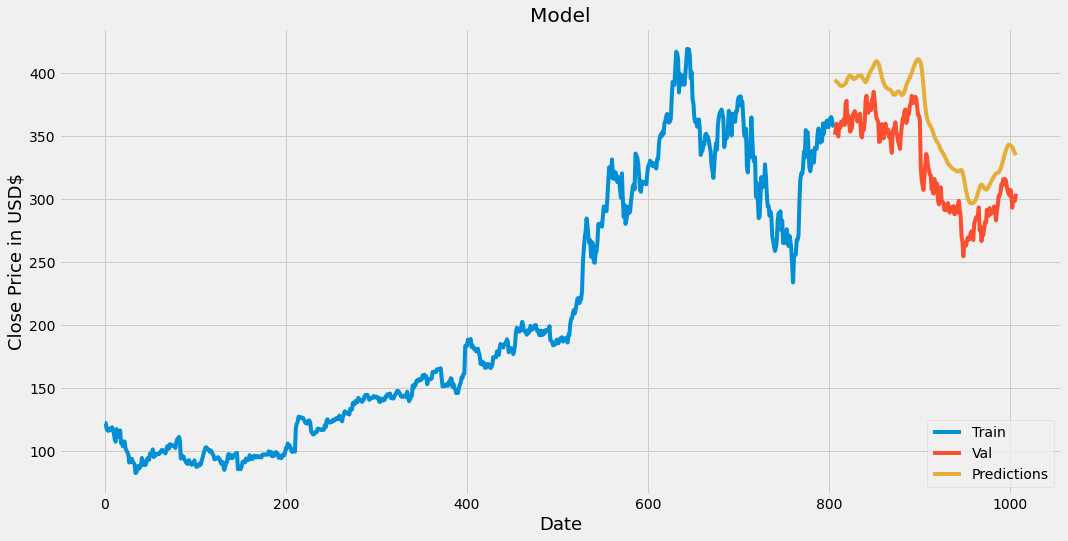

In [ ]:
### Plotting the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
### Visualizing the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel("Close Price in USD$", fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
### Showing the Predicted Prices
valid

,Close,Predictions
806,351.040009,394.563080
807,354.299988,393.901306
808,359.609985,393.055939
809,352.600006,392.515167
810,349.600006,391.717133
...,...,...
1002,293.119995,341.075745
1003,298.929993,339.423920
1004,298.440002,337.776489
1005,298.500000,336.202087
